In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from config import Config
import matplotlib.pyplot as plt
import math
import ntpath, glob
import numpy as np

In [66]:
df_all_SOCC = pd.read_csv(Config.SOCC_ANNOTATED_CONSTRUCTIVENESS_12000)

In [68]:
len(df_all_SOCC['article_id'].unique())

484

In [2]:
training_feats_file = Config.ALL_FEATURES_FILE_PATH

In [3]:
df = pd.read_csv(training_feats_file)

In [4]:
SOCC_df = df[df['source'] == 'SOCC']

In [5]:
SOCC_df['constructive'].value_counts()

1.0    5906
0.0    4856
Name: constructive, dtype: int64

In [6]:
SOCC_con_subset = SOCC_df[SOCC_df['constructive'] == 1.0]
SOCC_noncon_subset = SOCC_df[SOCC_df['constructive'] == 0.0]

In [63]:
SOCC_con_subset.shape

(5906, 50)

In [ ]:
SOCC_noncon_subset.shape

In [7]:
SOCC_df.columns

Index(['pp_comment_text', 'constructive', 'source',
       'has_conjunctions_and_connectives', 'has_stance_adverbials',
       'has_reasoning_verbs', 'has_modals', 'has_shell_nouns', 'length',
       'average_word_length', 'readability_score', 'personal_exp_score',
       'named_entity_count', 'nSents', 'avg_words_per_sent', 'specific_points',
       'dialogue', 'no_con', 'evidence', 'personal_story', 'solution',
       'no_respect', 'no_non_con', 'provocative', 'sarcastic', 'non_relevant',
       'unsubstantial', 'personal_attack', 'teasing', 'no_toxic', 'abusive',
       'embarrassment', 'inflammatory', 'SEVERE_TOXICITY:probability',
       'SEXUALLY_EXPLICIT:probability', 'TOXICITY:probability',
       'TOXICITY_IDENTITY_HATE:probability', 'TOXICITY_INSULT:probability',
       'TOXICITY_OBSCENE:probability', 'TOXICITY_THREAT:probability',
       'ATTACK_ON_AUTHOR:probability', 'ATTACK_ON_COMMENTER:probability',
       'ATTACK_ON_PUBLISHER:probability', 'INCOHERENT:probability',
    

In [8]:
constructive_chars = ['specific_points',
                      'dialogue', 
                      'no_con', 
                      'evidence', 
                      'personal_story', 
                      'solution']

non_constructive_chars = ['no_respect',
                          'no_non_con', 
                          'provocative',
                          'sarcastic',
                          'non_relevant',
                          'unsubstantial']

toxic_chars = ['personal_attack',
               'teasing',
               'no_toxic',
               'abusive',
               'embarrassment',
               'inflammatory']

In [9]:
cchar_con_dist = {}
cchar_noncon_dist = {}
ncchar_con_dist = {}
ncchar_noncon_dist = {}
toxicchar_con_dist = {}
toxicchar_noncon_dist = {}

## Distribution of constructive characteristics in constructive  and non-constructive comments 

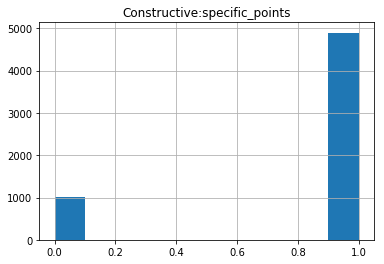

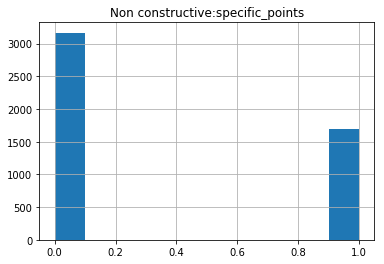

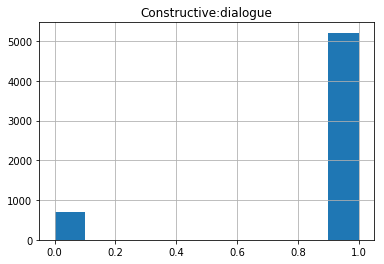

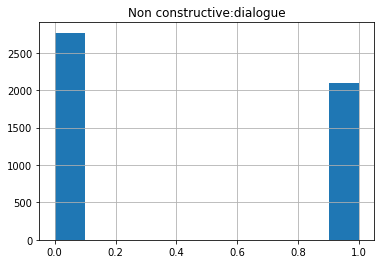

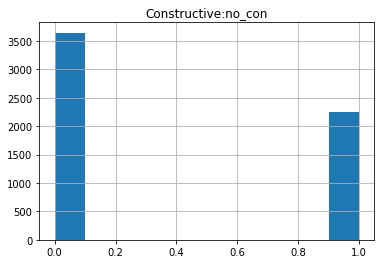

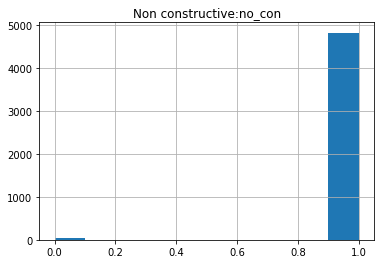

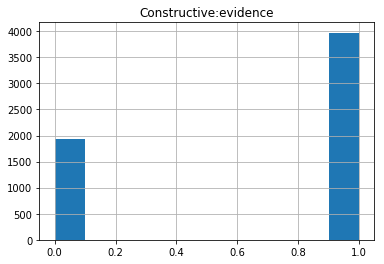

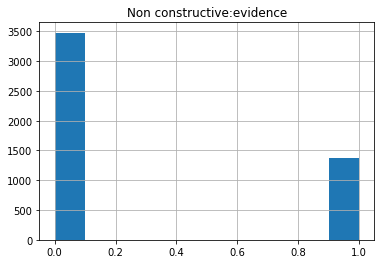

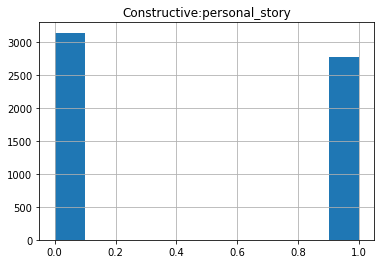

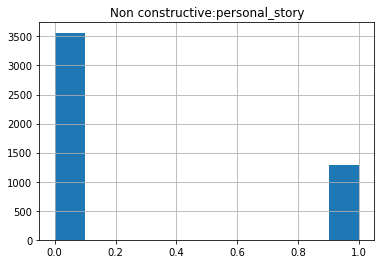

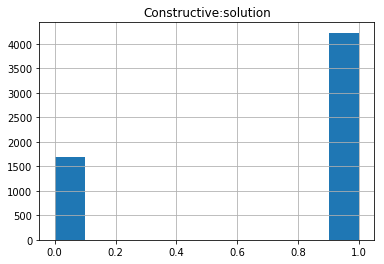

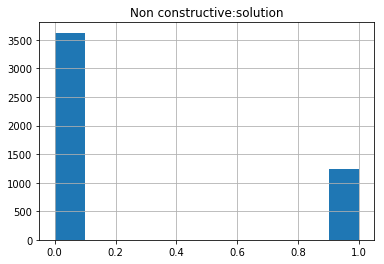

In [10]:
for ch in constructive_chars:    
    SOCC_con_subset.hist(column = [ch])
    plt.title('Constructive:' + ch)    
    cchar_con_dist[ch] = SOCC_con_subset[ch].sum()
    
    SOCC_noncon_subset.hist(column = [ch])
    plt.title('Non constructive:' + ch)
    cchar_noncon_dist[ch] = SOCC_noncon_subset[ch].sum()

In [11]:
cchar_con_dist

{'dialogue': 5208.0,
 'evidence': 3971.0,
 'no_con': 2259.0,
 'personal_story': 2768.0,
 'solution': 4225.0,
 'specific_points': 4897.0}

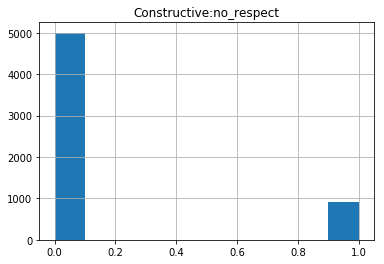

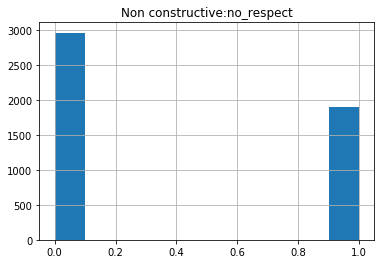

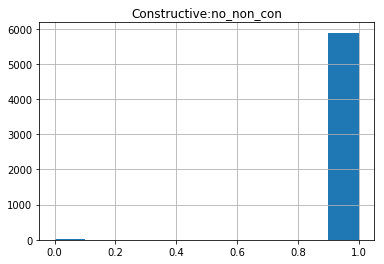

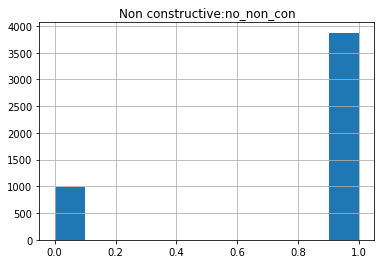

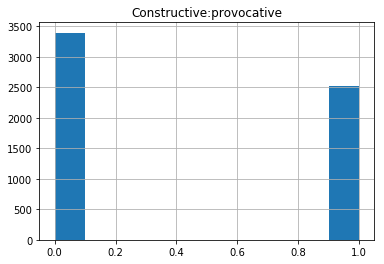

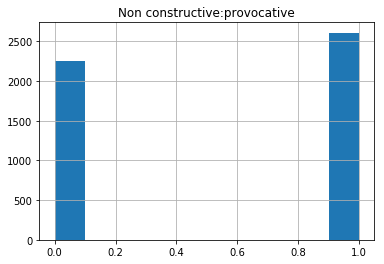

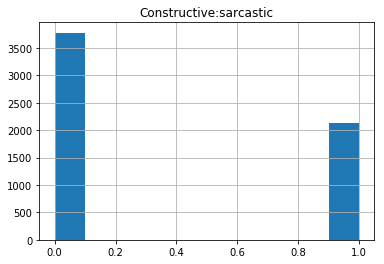

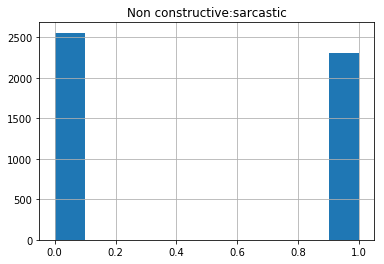

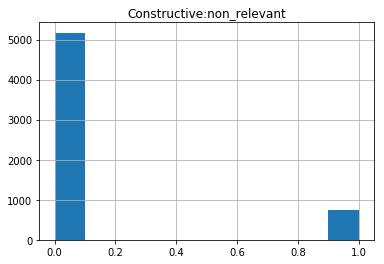

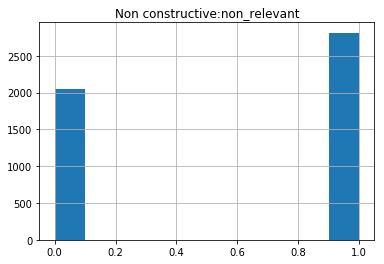

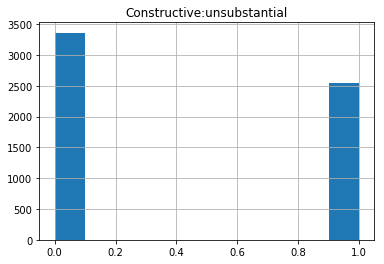

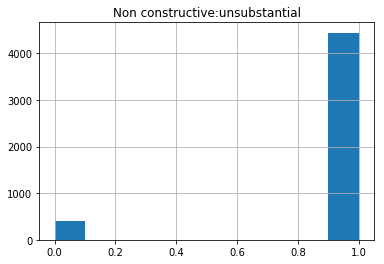

In [12]:
for ch in non_constructive_chars:    
    SOCC_con_subset.hist(column = [ch])
    plt.title('Constructive:' + ch)    
    ncchar_con_dist[ch] = SOCC_con_subset[ch].sum()
    
    SOCC_noncon_subset.hist(column = [ch])
    plt.title('Non constructive:' + ch)    
    ncchar_noncon_dist[ch] = SOCC_noncon_subset[ch].sum()

## Distribution of toxic characteristics in constructive and non-constructive comments 

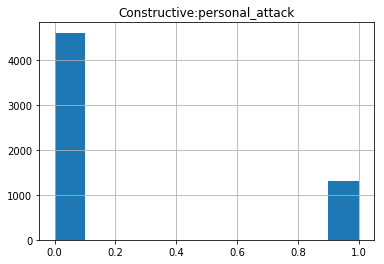

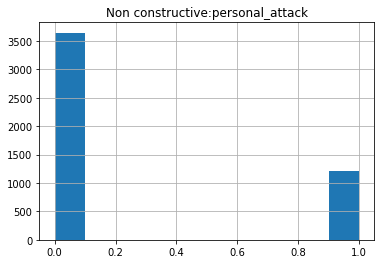

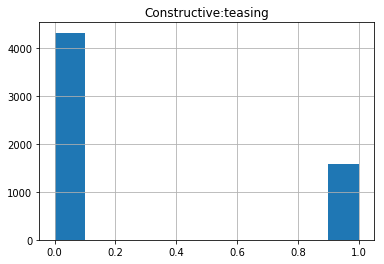

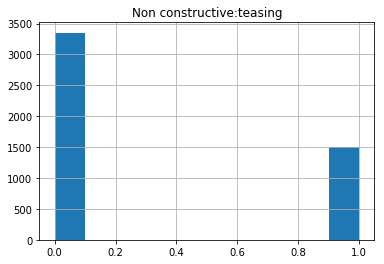

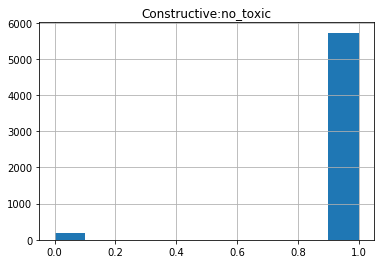

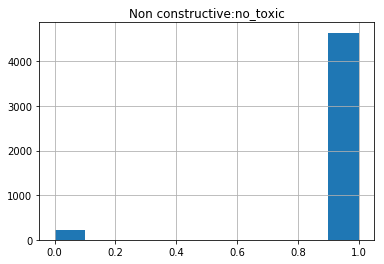

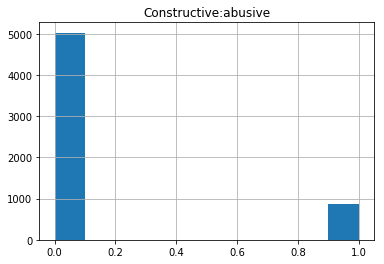

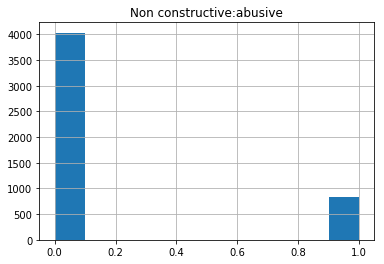

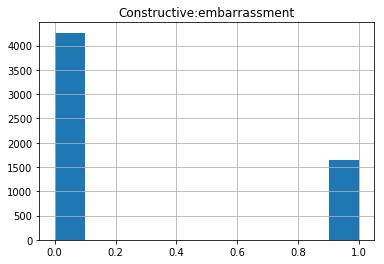

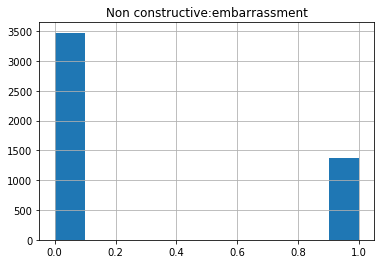

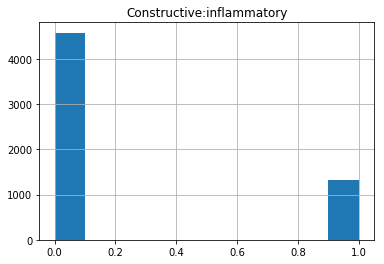

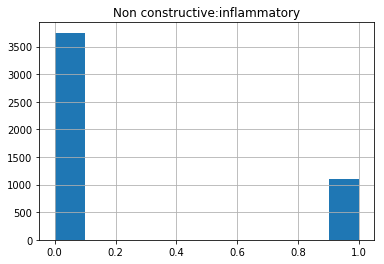

In [13]:
for ch in toxic_chars:    
    SOCC_con_subset.hist(column = [ch])
    plt.title('Constructive:' + ch)    
    toxicchar_con_dist[ch] = SOCC_con_subset[ch].sum()
    
    SOCC_noncon_subset.hist(column = [ch])
    plt.title('Non constructive:' + ch)
    toxicchar_noncon_dist[ch] = SOCC_noncon_subset[ch].sum()

In [56]:
def bar_plots(constructive_freq, 
              non_constructive_freq, 
              title, 
              characteristics,
              save_file_path):
    N = len(characteristics)
    constructive_freq = constructive_freq
    #menStd =   (2, 3, 4, 1, 2)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, constructive_freq, width, color='seagreen')

    non_constructive_freq = non_constructive_freq
    #womenStd =   (3, 5, 2, 3, 3)
    rects2 = ax.bar(ind+width, non_constructive_freq, width, color='royalblue')

    # add some
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(characteristics)
    ax.tick_params(axis='x', rotation=15)

    ax.legend( (rects1[0], rects2[0]), ('Constructive', 'Non constructive') )
    plt.savefig(save_file_path, format='pdf')

    #plt.show()

In [57]:
constructive_chars_labels = list(cchar_con_dist.keys())
constructive_freq = list(cchar_con_dist.values())
non_constructive_freq = [val for (k, val) in cchar_noncon_dist.items()]
save_file_path = Config.FIGURES_PATH + 'constructive_characteristics_dist.pdf'

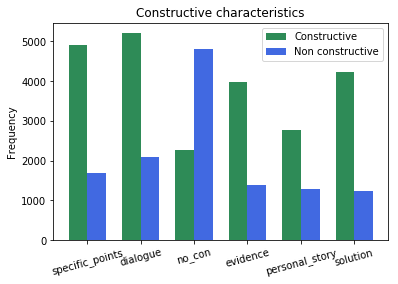

In [58]:
bar_plots(constructive_freq, 
          non_constructive_freq, 
          'Constructive characteristics',
          constructive_chars_labels,
          save_file_path
         )

In [59]:
non_constructive_chars_labels = list(ncchar_con_dist.keys())
constructive_freq = list(ncchar_con_dist.values())
non_constructive_freq = [val for (k, val) in ncchar_noncon_dist.items()]
save_file_path = Config.FIGURES_PATH + 'non_constructive_characteristics_dist.pdf'

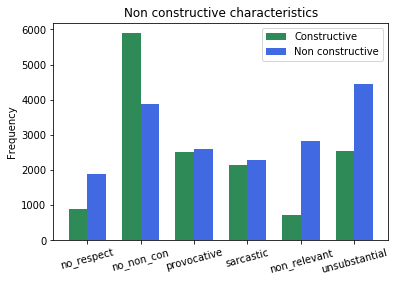

In [60]:
bar_plots(constructive_freq, 
          non_constructive_freq, 
          'Non constructive characteristics', 
          non_constructive_chars_labels, 
          save_file_path)

In [61]:
toxic_chars_labels = list(toxicchar_con_dist.keys())
constructive_freq = list(toxicchar_con_dist.values())
non_constructive_freq = [val for (k, val) in toxicchar_noncon_dist.items()]
save_file_path = Config.FIGURES_PATH + 'toxic_characteristics_dist.pdf'

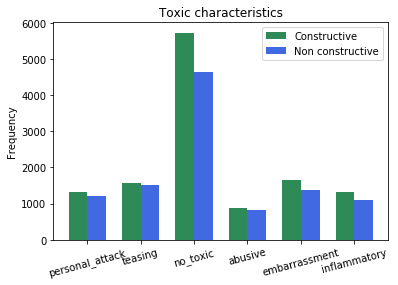

In [62]:
bar_plots(constructive_freq, 
          non_constructive_freq, 
          'Toxic characteristics', 
          toxic_chars_labels,
          save_file_path
         )